# Lab 4: Comparison of Classifiers

## A. Preparation

### Import Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,roc_curve, auc,roc_auc_score, accuracy_score, f1_score, average_precision_score, precision_recall_curve,recall_score,precision_score

from sklearn.model_selection import StratifiedKFold, GridSearchCV

from scipy import interp

import warnings
warnings.filterwarnings('ignore')

### Import evaluation and plotting functions

In [2]:
%run ./Lab4_Functions_18200044.ipynb

### Load and prepare the dataset for training and evaluating a classifier
Feel free to apply any other pre-processing technique at this point.

In [3]:
lab4_df = pd.read_csv("./loans_et4.csv")
lab4_df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


In [4]:
lab4_df.Loan_Status.value_counts(normalize=True).mul(100)

1    69.166667
0    30.833333
Name: Loan_Status, dtype: float64

We are in an Imbalanced data case, 70% Of Loan_Status=1

In [5]:
# target attribute
target = lab4_df['Loan_Status']

# predictor attributes
predictors = lab4_df.drop('Loan_Status', axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute 'type' is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

### Prepare an array of 100 equally spaced false-positive-rate values between 0 and 1
To be used as an x-axis in ROC curve plots.

In [6]:
mean_fpr = np.linspace(start=0, stop=1, num=100)

## TASK 1

## B. Evaluation and Comparison of Classifiers

### Train a Probablistic SVM Classifier

In [7]:
# Create an SVM classifier object as a probabilistic classifier with default parameters
SVM_classifier = svm.SVC(probability=True)

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_SVM, f1_scores_SVM, tprs_SVM, aucs_SVM, recalls_SVM, precisions_SVM = evaluate_classifier(folds=5, 
                                                                                 p=predictors, t=target, 
                                                                                 classifier=SVM_classifier, 
                                                                                mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

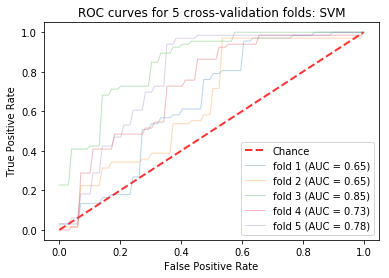

In [8]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

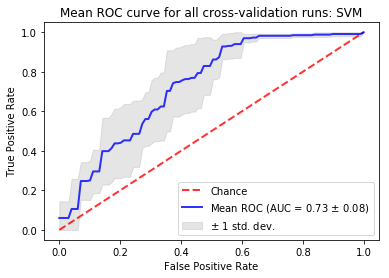

In [9]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_SVM, aucs_SVM, 'SVM')

### Train a Naive Bayes Classifier

In [10]:
# Create a Naive Bayes classifier object with default parameters (note: Naive Bayes is a probabilistic classifier by default)
NB_classifier = GaussianNB()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_NB, f1_scores_NB, tprs_NB, aucs_NB, recalls_NB, precisions_NB = evaluate_classifier(folds=5, 
                                                                           p=predictors, t=target, 
                                                                           classifier=NB_classifier, 
                                                                           mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

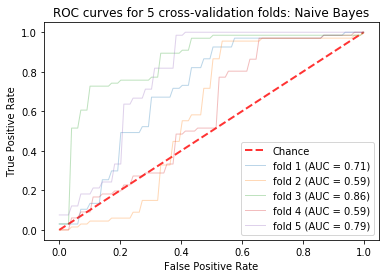

In [11]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

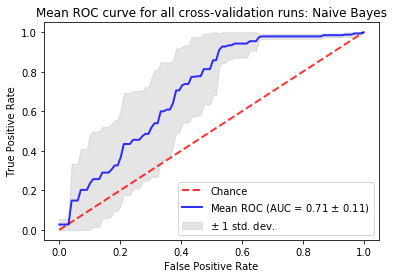

In [12]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_NB, aucs_NB, 'Naive Bayes')

### Train a Random Forest Classifier

In [13]:
# Create a Random Forest classifier object with default parameters 
RF_classifier = RandomForestClassifier()

# Train and evaluate the classifier by applying 5-fold cross validation.
# We use 5 folds only, because the data set is rather small.
accuracies_RF, f1_scores_RF, tprs_RF, aucs_RF, recalls_RF, precisions_RF = evaluate_classifier(folds=5, 
                                                                           p=predictors, t=target, 
                                                                           classifier=RF_classifier, 
                                                                           mean_fpr=mean_fpr)
# runs k-fold cross validation to measure various metrics of a classifier:
#        accuracies - an array of accuracies for each fold
#        f1_scores - an array of F1-scores (also known as F-scores) for each fold
#        tprs - true positive rates, one per cross-validation fold
#        aucs - areas below the ROC curve, one per cross-validation fold

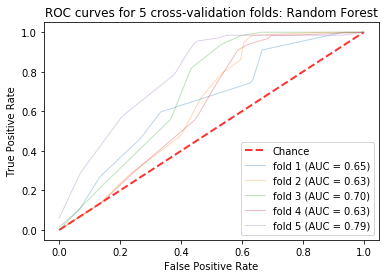

In [14]:
# Plot a ROC curve for each cross-validation fold
plot_roc_cv_folds(mean_fpr, tprs_RF, aucs_RF, 'Random Forest')

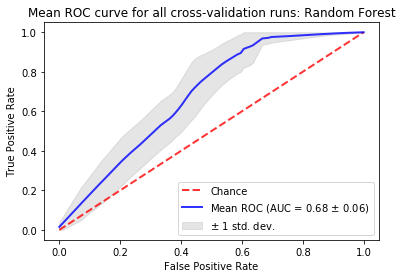

In [15]:
# Plot a mean ROC curve for all cross-validation runs
plot_roc_mean(mean_fpr, tprs_RF, aucs_RF, 'Random Forest')

### Compare All Trained Classifiers

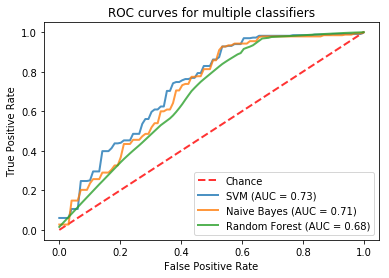

In [16]:
plot_roc_multiple_classifiers(mean_fpr, 
                              np.stack((np.mean(tprs_SVM, axis=0), np.mean(tprs_NB, axis=0), np.mean(tprs_RF, axis=0))), 
                              np.array([np.mean(aucs_SVM), np.mean(aucs_NB), np.mean(aucs_RF)]), 
                              np.array(['SVM', 'Naive Bayes', 'Random Forest']))

In [17]:
# Compare the statistics of the accuracies across all cross-validation folds
accuracies_df = pd.DataFrame(data={'SVM' : accuracies_SVM, 'Naive Bayes' : accuracies_NB, 'Random Forest' : accuracies_RF})

In [18]:
accuracies_df.describe()

,SVM,Naive Bayes,Random Forest
count,5.000000,5.000000,5.000000
mean,0.808403,0.791670,0.717313
std,0.029567,0.053465,0.104835
min,0.778947,0.715789,0.546392
25%,0.783505,0.762887,0.690722
50%,0.812500,0.804124,0.757895
75%,0.814433,0.822917,0.789474
max,0.852632,0.852632,0.802083


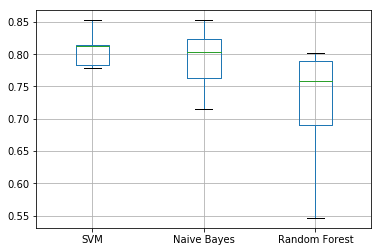

In [19]:
accuracies_df.boxplot()

In [20]:
# Compare the statistics of the F1-scores across all cross-validation folds
f1_scores_df = pd.DataFrame(data={'SVM' : f1_scores_SVM, 'Naive Bayes' : f1_scores_NB, 'Random Forest' : f1_scores_RF})

In [21]:
f1_scores_df.describe()

,SVM,Naive Bayes,Random Forest
count,5.000000,5.000000,5.000000
mean,0.876278,0.860583,0.785781
std,0.017193,0.036598,0.117546
min,0.860927,0.808511,0.584906
25%,0.860927,0.839161,0.779412
50%,0.878378,0.872483,0.839161
75%,0.878378,0.882759,0.852941
max,0.902778,0.900000,0.872483


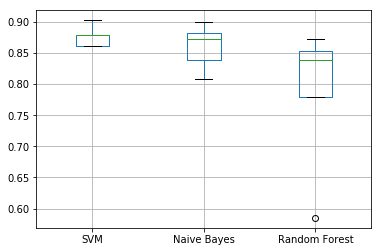

In [22]:
f1_scores_df.boxplot()

#### Conclusion

It is clear that SVM and Naive Bayes perform better than Random forest on this classification problem. Indeed, not only auc, accuracy and F1 scores are greater for SVM and Naive Bayes but also their variances are less than Random Forest ones. Hence,  the comparison has to be done between SVM and Naive Bayes classifiers.
SVM is having a better AUC score of 0.73 compared of an AUC of 0.71 for Naive Bayes, the variance is also smaller for SVM. Same conclusion is done both for accuracy and F1 scores, thus SVM is our best model regarding this comparison based on AUC, Accuracy and F1 scores.


## TASK 2

In [23]:
# Compare the statistics of the recalls and precisions across all cross-validation folds
recalls_df = pd.DataFrame(data={'SVM' : recalls_SVM, 'Naive Bayes' : recalls_NB, 'Random Forest' : recalls_RF})
# Compare the statistics of the F1-scores across all cross-validation folds
precisions_df = pd.DataFrame(data={'SVM' : precisions_SVM, 'Naive Bayes' : precisions_NB, 'Random Forest' : precisions_RF})

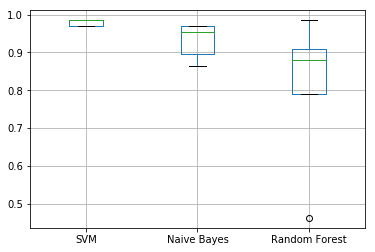

In [24]:
recalls_df.boxplot()

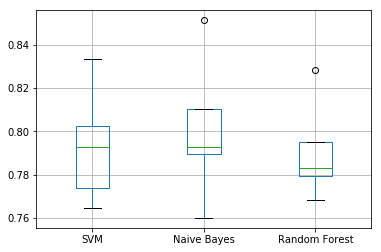

In [25]:
precisions_df.boxplot()

## TASK 3

In [26]:
#This function tries different paires of C and Gamma parameters, trains an SVM classifier on 5 folds CV and
#returns for each couple of parameters values the required scores
def svc_param_selection(X, y, nfolds):
    scoring = {'Precision': make_scorer(precision_score),'Recall': make_scorer(recall_score),'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds,scoring=scoring,refit='AUC')
    grid_search.fit(X, y)
    cv_results=pd.DataFrame.from_dict(grid_search.cv_results_)
    return cv_results.loc[:,["params","mean_test_Accuracy","mean_test_Precision","mean_test_Recall","mean_test_AUC"]]

svc_param_selection(predictors, target, 5)

,params,mean_test_Accuracy,mean_test_Precision,mean_test_Recall,mean_test_AUC
0,"{'C': 0.001, 'gamma': 0.001}",0.691667,0.691667,1.000000,0.698599
1,"{'C': 0.001, 'gamma': 0.01}",0.691667,0.691667,1.000000,0.720513
2,"{'C': 0.001, 'gamma': 0.1}",0.691667,0.691667,1.000000,0.755494
3,"{'C': 0.001, 'gamma': 1}",0.691667,0.691667,1.000000,0.758027
4,"{'C': 0.01, 'gamma': 0.001}",0.691667,0.691667,1.000000,0.698599
5,"{'C': 0.01, 'gamma': 0.01}",0.691667,0.691667,1.000000,0.715504
6,"{'C': 0.01, 'gamma': 0.1}",0.691667,0.691667,1.000000,0.741400
7,"{'C': 0.01, 'gamma': 1}",0.691667,0.691667,1.000000,0.743953
8,"{'C': 0.1, 'gamma': 0.001}",0.691667,0.691667,1.000000,0.699226
9,"{'C': 0.1, 'gamma': 0.01}",0.691667,0.691667,1.000000,0.722834


Best accuracy is obtained with :
* {'C': 1, 'gamma': 0.1}	
* {'C': 10, 'gamma': 0.01}
* {'C': 10, 'gamma': 0.1}	

As they present the highest Accuracy score, and also Precision which is a good thing since we want to minimize false positives. We decide to select a model with **{'C': 10, 'gamma': 0.01}** parameters since they offer best AUC score compared with others.
